<a href="https://colab.research.google.com/github/mvapontes/KEGGAPI.jl/blob/main/examples/Case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Hardware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-08-04 13:35:18 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...


In [17]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [18]:
using Pkg

In [3]:
Pkg.add("Revise")
Pkg.add("DataFrames")
Pkg.add("BenchmarkTools")
Pkg.add(url="https://github.com/bwbioinfo/KEGGAPI.jl")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed OrderedCollections ─ v1.6.2
   Installed LoweredCodeUtils ─── v2.3.0
   Installed Requires ─────────── v1.3.0
   Installed CodeTracking ─────── v1.3.2
   Installed JuliaInterpreter ─── v0.9.23
   Installed Revise ───────────── v3.5.3
    Updating `~/.julia/environments/v1.8/Project.toml`
  [295af30f] + Revise v3.5.3
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [da1fd8a2] + CodeTracking v1.3.2
  [aa1ae85d] + JuliaInterpreter v0.9.23
  [6f1432cf] + LoweredCodeUtils v2.3.0
  [bac558e1] + OrderedCollections v1.6.2
  [ae029012] + Requires v1.3.0
  [295af30f] + Revise v3.5.3
  [8ba89e20] + Distributed
Precompiling project...
  ✓ Requires
  ✓ OrderedCollections
  ✓ CodeTracking
  ✓ JuliaInterpreter
  ✓ LoweredCodeUtils
  ✓ Revise
  6 dependencies successfully precompiled in 22 seconds. 20 already precompiled.
   Resolving package versions...
   Installed Crayons ─────────────

In [19]:
using Revise
using DataFrames
using BenchmarkTools
using KEGGAPI

# Case 2: EC reaction information in Kegg Database



### 1. Identify reactions in KEGG database assiciated to a European Community number (EC.)

To determine if a reaction is part of KEGG database and obtain its information the function link takes as input the element the user is looking for, in this case "reaction", and the EC number of a reaction as "ec:X.XX.XX.XX"

In [5]:
@time kegg_reaction = KEGGAPI.link("reaction", "ec:3.2.1.14")
DataFrame(
  kegg_reaction.data,
  kegg_reaction.colnames
)

 15.293495 seconds (15.20 M allocations: 767.305 MiB, 6.45% gc time, 95.27% compilation time: 2% of which was recompilation)


Row,Target ID,Source ID
,String,String
1,ec:3.2.1.14,rn:R01206
2,ec:3.2.1.14,rn:R02334
3,ec:3.2.1.14,rn:R06081
4,ec:3.2.1.14,rn:R06082


### 2. Get reaction information

To obtain the reactions information, the "kegg_get" function requires an array of reaction KEGG identifier as "rn:RXXXX



In [7]:
@time kegg_reaction_info = KEGGAPI.kegg_get(kegg_reaction.data[2])
kegg_reaction_info[2]

  0.197751 seconds (235 allocations: 21.617 KiB)


4-element Vector{String}:
 "ENTRY       R01206             " ⋯ 527 bytes ⋯ " endochitinase B [EC:3.2.1.14]"
 "ENTRY       R02334             " ⋯ 480 bytes ⋯ " endochitinase B [EC:3.2.1.14]"
 "ENTRY       R06081             " ⋯ 221 bytes ⋯ "s: R01206\nENZYME      3.2.1.14"
 "ENTRY       R06082             " ⋯ 209 bytes ⋯ "s: R02334\nENZYME      3.2.1.14"

### 3. Identify the compounds related to the reaction

The input of the link function are two strings. The element the user is looking for, in this case a compound, and the reaction number as rn:RXXXXX.

In [9]:
@time kegg_compound = KEGGAPI.link("compound", "rn:R01206")
DataFrame(
  kegg_compound.data,
  kegg_compound.colnames
)

  0.235061 seconds (232 allocations: 13.734 KiB)


Row,Target ID,Source ID
,String,String
1,rn:R01206,cpd:C00001
2,rn:R01206,cpd:C00140
3,rn:R01206,cpd:C00461
4,rn:R01206,cpd:C00461


### 4. Get compound information

To obtain the compund information, the "kegg_get" function requires an array of compound KEGG identifier as "cpd:CXXXXX

In [16]:
@time kegg_compound_info = KEGGAPI.kegg_get(kegg_compound.data[2])

  1.952866 seconds (478 allocations: 624.625 KiB)


2-element Vector{Vector{String}}:
 ["https://rest.kegg.jp/get/cpd:C00001+cpd:C00140+cpd:C00461+cpd:C00461/"]
 ["ENTRY       C00001                      Compound\nNAME        H2O;\n            Water\nFORMULA     H2O\nEXACT_MASS  18.0106\nMOL_WEIGHT  18.0153\nREMARK      Same as: D00001\nREACTION    R00001 R00002 R00004 R00005 R00009 R00010 R00011 R00017 \n            R00022 R00024 R00025 R00026 R00028 R00036 R00041 R00044 \n            R00045 R00047 R00048 R00052 R00053 R00054 R00055 R00056 \n            R00058 R00059 R00060 R00061 R00068 R00069 R00070 R00072 \n            R00073 R00074 R00077 R00078 R00080 R00081 R00082 R00083 \n            R00084 R00085 R00086 R00087 R00088 R00090 R00102 R00103 \n            R00111 R00113 R00118 R00122 R00123 R00125 R00128 R00131 \n            R00132 R00135 R00138 R00143 R00145 R00146 R00148 R00149 \n            R00150 R00152 R00155 R00159 R00160 R00164 R00173 R00177 \n            R00181 R00182 R00183 R00184 R00187 R00188 R00191 R00192 \n            R

### 5. Download and save a reaction image.

The get_image function is to download a any image, the imput is the reaction number as rn:RXXXXX

The save_image function is to save the figure in a png file. The input is a string wiht the name of the file and the extension ".png"

In [ ]:
@time kegg_image = KEGGAPI.get_image("rn:R01206")
@time KEGGAPI.save_image(kegg_image, "r01206.png")

  0.252686 seconds (206 allocations: 39.047 KiB)
  0.017544 seconds (10.67 k allocations: 571.283 KiB, 97.37% compilation time)


"r01206.png"

### 6. Visualization of the reaction image

To visualize the saved image, load the png file with fileIO package option.

In [ ]:
Pkg.add("TestImages")
Pkg.add("Images")
Pkg.add("FileIO")
Pkg.add("Colors")

   Resolving package versions...
   Installed JpegTurbo_jll ─────── v2.1.91+0
   Installed ImageIO ───────────── v0.6.7
   Installed Adapt ─────────────── v3.6.2
   Installed ColorTypes ────────── v0.11.4
   Installed OffsetArrays ──────── v1.12.10
   Installed AxisArrays ────────── v0.4.7
   Installed TiffImages ────────── v0.6.4
   Installed ImageCore ─────────── v0.10.1
   Installed JpegTurbo ─────────── v0.1.3
   Installed ImageBase ─────────── v0.1.7
   Installed PNGFiles ──────────── v0.4.0
   Installed Zstd_jll ──────────── v1.5.5+0
   Installed LERC_jll ──────────── v3.0.0+1
   Installed TensorCore ────────── v0.1.1
   Installed IntervalSets ──────── v0.7.7
   Installed IterTools ─────────── v1.8.0
   Installed ImageMagick ───────── v1.3.0
   Installed Inflate ───────────── v0.1.3
   Installed TestImages ────────── v1.8.0
   Installed Imath_jll ─────────── v3.1.7+0
   Installed IndirectArrays ────── v1.0.0
   Installed PkgVersion ────────── v0.3.2
   Installed QOI ─────────────

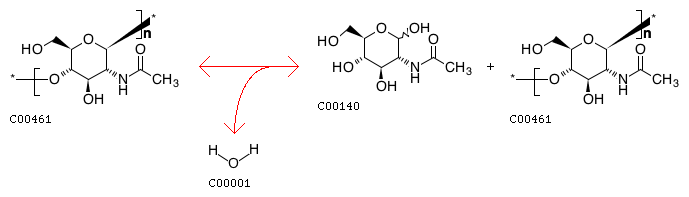

In [ ]:
using Images, TestImages, Colors
img = load("r01206.png")

### 7. Get Kegg Ortholog group

To get the ortholog group use the link function with the string "ko" and the reaction number or concatenate string as "RXXXXX"

In [24]:
kegg_orthogroup = KEGGAPI.link("ko", "R01206")
DataFrame(
  kegg_orthogroup.data,
  kegg_orthogroup.colnames
)

Row,Target ID,Source ID
,String,String
1,rn:R01206,ko:K01183
2,rn:R01206,ko:K13381
3,rn:R01206,ko:K20547
